# Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

b) верхнетреугольная, ортогональная:

c) нижнетреугольная, ортогональная:

d) матрица, у которой определитель = 1, и все элементы не равны 0:

e) матрица (3x3), у которой определитель = 1:

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

In [1]:
import numpy as np
import pylab as pl
from scipy import linalg

a)

In [3]:
m1 = np.array([[3, 0],
               [0, -3]])

print('Проверка ортогональности m1:') 
print(m1*m1.T)

Проверка ортогональности m1:
[[9 0]
 [0 9]]


b)

In [4]:
m2 = np.array([[1, 2],
               [0, 1]])
print('Проверка ортогональности m2:') 
print(m2*m2.T)

Проверка ортогональности m2:
[[1 0]
 [0 1]]


c)

In [5]:
m3 = np.array([[3, 0],
               [6, 3]])
print('Проверка ортогональности m3:') 
print(m3*m3.T)

Проверка ортогональности m3:
[[9 0]
 [0 9]]


d)

In [7]:
m4 = np.array([[1, 1],
               [1, 2]])
np.linalg.det(m4)

1.0

e)

In [8]:
m5 = np.array([[1, 1, 0],
               [1, 2, 0],
               [0, 0, 1]])
np.linalg.det(m5)

1.0

# Задание 2:¶

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [14]:
m = np.array([[2, 2],
              [1, 3]])
print(m, "\n")

a, U = np.linalg.eig(m)
print('Собственные значения: ')
print(a)
print('\nСобственные вектора:')
print(U)

[[2 2]
 [1 3]] 

Собственные значения: 
[1. 4.]

Собственные вектора:
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


$$ det=2*3-1*2=4 $$

Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [15]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m, "\n")

a, U = np.linalg.eig(m)
print('Собственные значения: ')
print(a)
print('\nСобственные вектора: ')
print(U)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]] 

Собственные значения: 
[3. 6. 3.]

Собственные вектора: 
[[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]


$$ det=54 $$

# Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [16]:
m = np.array([[1, 2],
              [2, 3]])
print(m,'\n')

a, U = np.linalg.eig(m)
print('Собственные значения: ')
print(a)
print('\nСобственные вектора:')
print(U)
print()
print(U * np.diag(a) * U.T)

[[1 2]
 [2 3]] 

Собственные значения: 
[-0.23606798  4.23606798]

Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

[[-0.17082039 -0.        ]
 [-0.          3.06524758]]


# Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [17]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [18]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [19]:
X, y = load_digits(return_X_y=True)

In [20]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


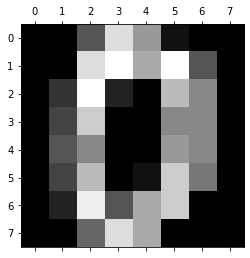

In [21]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [22]:
for i in range(5, 50, 5):
    print(f'Количество компонент: {i}')
    svd = TruncatedSVD(n_components=i)
    X_reduced = svd.fit_transform(X)
    svd.explained_variance_ratio_.sum()

    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    print('Оценка модели:', rf_reduced.oob_score_)
    print()

Количество компонент: 5
Оценка модели: 0.8681135225375626

Количество компонент: 10
Оценка модели: 0.9532554257095158

Количество компонент: 15
Оценка модели: 0.9671675013912076

Количество компонент: 20
Оценка модели: 0.9699499165275459

Количество компонент: 25
Оценка модели: 0.9682804674457429

Количество компонент: 30
Оценка модели: 0.9654980523094046

Количество компонент: 35
Оценка модели: 0.9693934335002783

Количество компонент: 40
Оценка модели: 0.9660545353366722

Количество компонент: 45
Оценка модели: 0.9699499165275459

